In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('ADNI_baseline_clean.csv')

In [ ]:
df.head()

,PTID,AGE,APOE4,Hippocampus,ICV,MMSE,CDRSB,DX,Hippocampus_ICV
0,011_S_0002,74.3,0.0,8336.0,1984660.0,28.0,0.0,CN,0.004200
1,011_S_0003,81.3,1.0,5319.0,1920690.0,20.0,4.5,Dementia,0.002769
2,022_S_0004,67.5,0.0,6869.0,1679440.0,27.0,1.0,MCI,0.004090
3,011_S_0005,73.7,0.0,7075.0,1640770.0,29.0,0.0,CN,0.004312
4,100_S_0006,80.4,0.0,5348.0,1485830.0,25.0,0.5,MCI,0.003599


We want to check if the data is balanced and examine the general distribution of the data


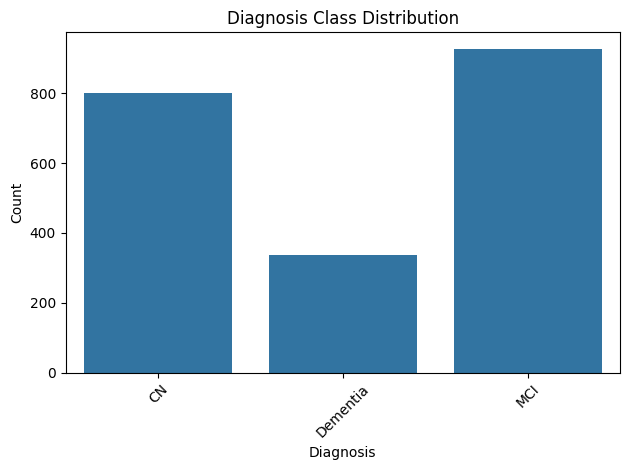

In [ ]:
# 1. Visualize DX class distribution

sns.countplot(x='DX', data=df)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We noticed a class imbalance especially in Dementiaand we believe this can affect the model and can lead to affected sensitivity to dementia. The proposed method to slove this is Resampling the Dementia class.

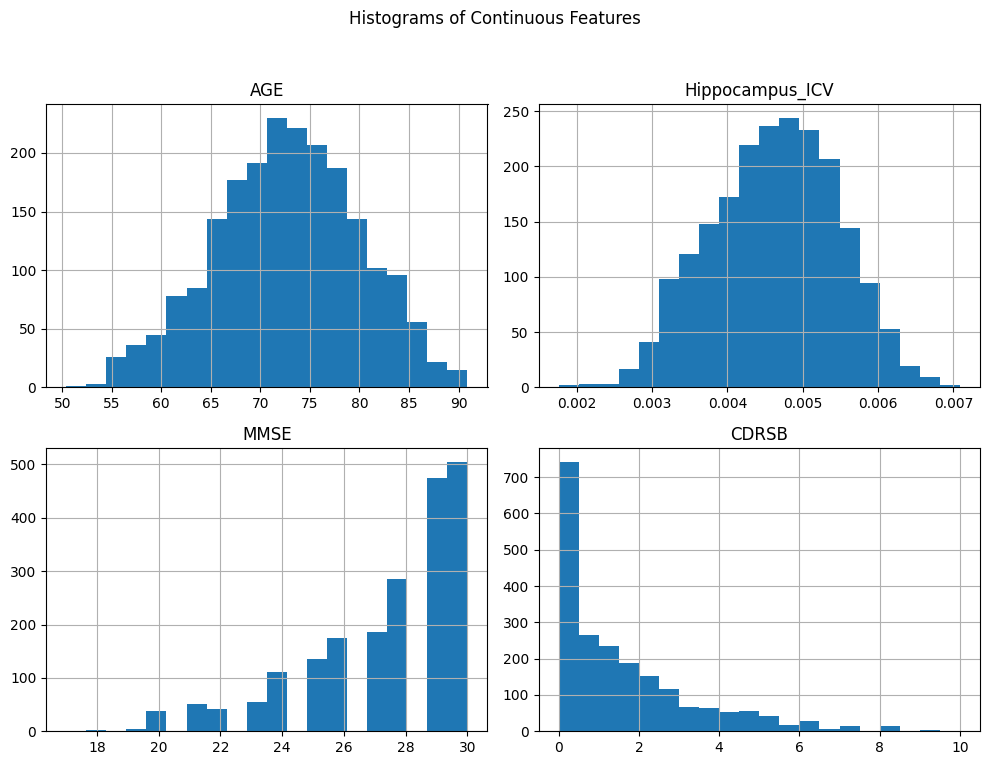

In [ ]:
# 2. Distribution of continuous variables

continuous_vars = ['AGE', 'Hippocampus_ICV', 'MMSE', 'CDRSB']
df[continuous_vars].hist(bins=20, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Histograms of Continuous Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The DATA fits the expected distribution the Age is expected to be gaussian and The MMSE and CDRSB are not expected to be

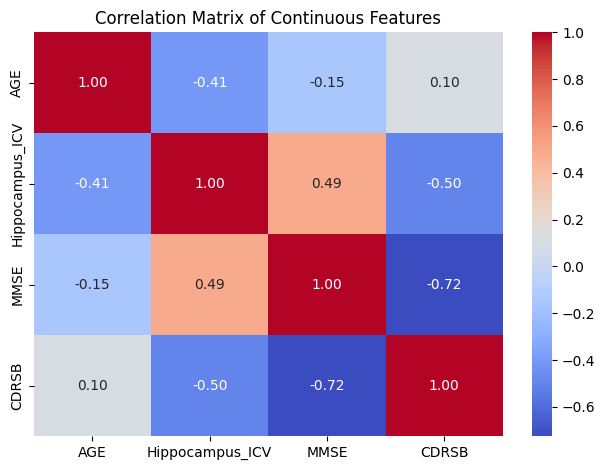

In [ ]:
# 3. Correlation matrix
sns.heatmap(df[continuous_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Features")
plt.tight_layout()
plt.show()

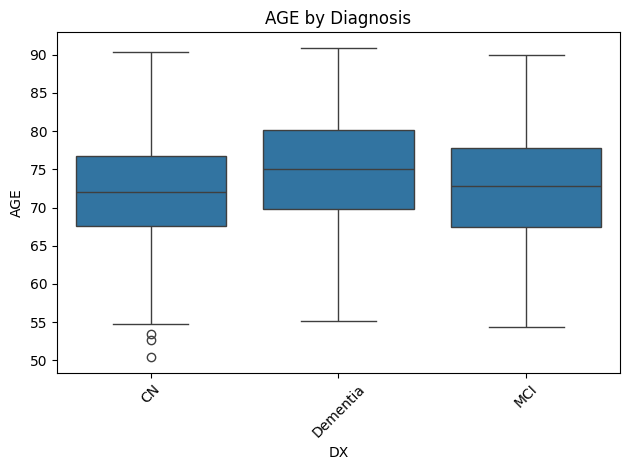

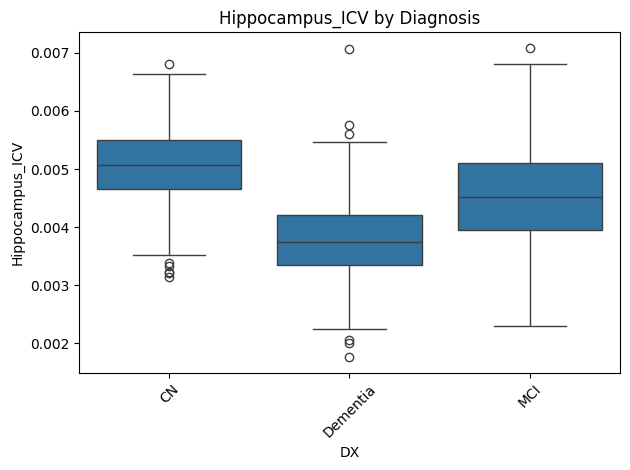

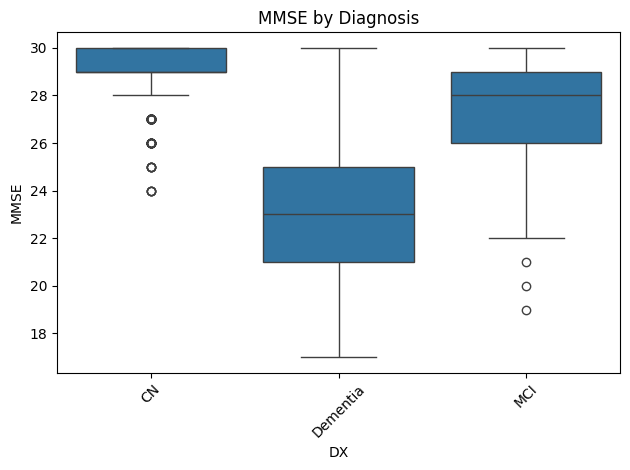

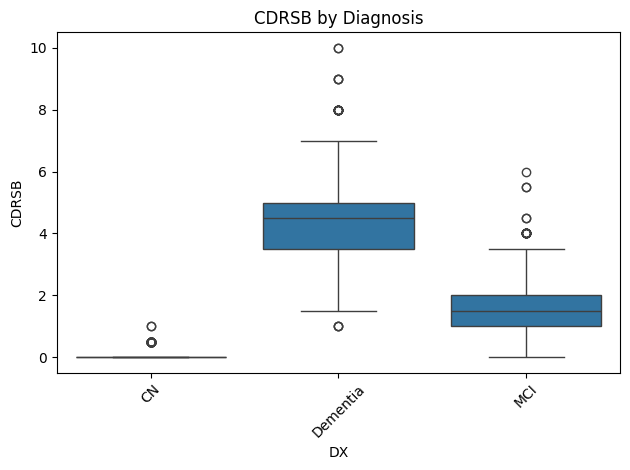

In [ ]:
# 4. Boxplots for continuous variables grouped by DX
for var in continuous_vars:
    sns.boxplot(x='DX', y=var, data=df)
    plt.title(f'{var} by Diagnosis')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# **Major Insights and Next Steps:**
#
# * **Class Imbalance:** The dataset exhibits a significant class imbalance, particularly with a lower representation of the 'Dementia' class.
# * **Impact on Modeling:** This imbalance can bias the model during training, leading to poor performance, especially in identifying cases of dementia.
# * **Resampling:** To address this issue, we will need to implement resampling techniques (e.g., oversampling the minority class or undersampling the majority class) before training the model. This will help improve the model's ability to generalize and accurately classify all classes.